In [1]:
# data extraction

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# column "ocean_proximity" is string
# check how many areas exist

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


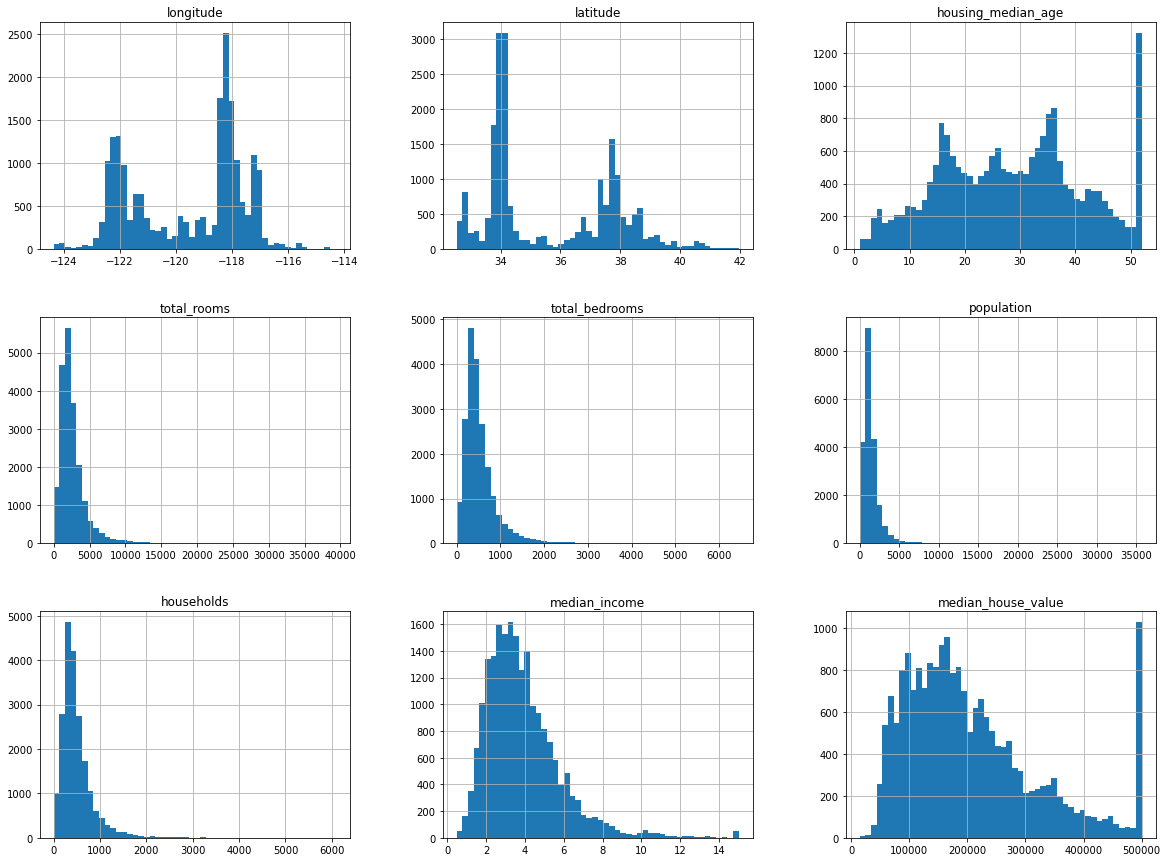

In [8]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# split train set from the original set

def split_train_test(data, test_ratio):
    shuffled_indices= np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print("train set: {}\ntest_set: {}".format(len(train_set), len(test_set)))

train set: 16512
test_set: 4128


---
- function 'split_train_test' has problem when using new updated data set


- to solve the problem, using the identifier of samples
    - (assume that the identifier of each sample is unique and immutable)
---

In [10]:
# solution
from zlib import crc32
import hashlib

def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2 * 32

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
# return the dataframe which'index' cloumn is added
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing_with_id = housing.reset_index()   
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


---
- When using the index of the row as a unique identifier, new data should be added to the end of the dataset, 
- and new data should not delete any row
---

---
#### 'train_test_split' is similar to 'train_test_split' and 'split_train_test but has two more characteristics
    - 1. 'random_state' parameter which can set the initial value of random value
    - 2. multiple datasets, which have same number of row, can be divided based on same index
---

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

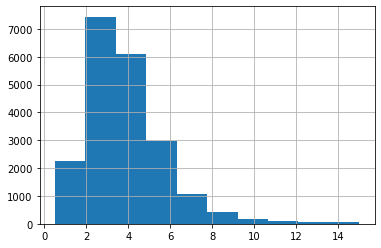

In [17]:
housing["median_income"].hist()

<AxesSubplot:>

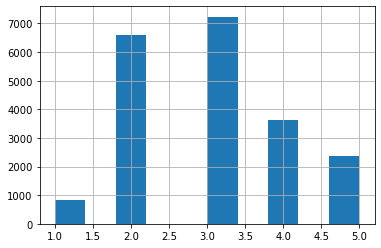

In [18]:
# each class should have enough number of sample
# data should not be divided into many classes

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0, 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1,2,3,4,5])
housing["income_cat"].hist()

In [19]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [20]:
# separate test_set and train_set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [22]:
# initialize
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

---
### Visualization
---

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

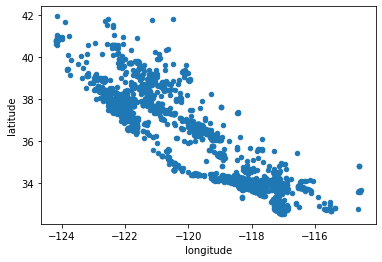

In [23]:
housing = strat_test_set.copy()

housing.plot(kind="scatter", x="longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

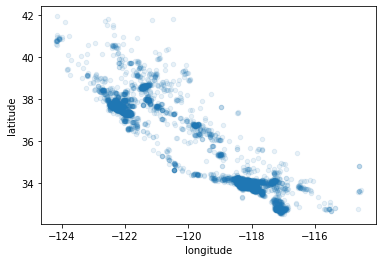

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [25]:
# s = population of the area
# c = color represents the price
# cmap = blue represents lower price and red represents higher price

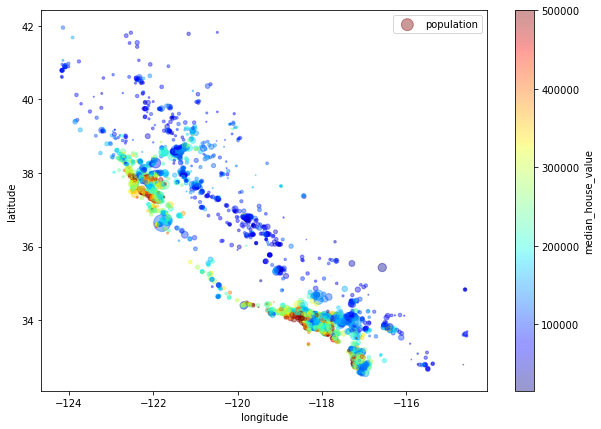

In [26]:
housing.plot(kind = "scatter", x = "longitude", y="latitude", alpha = 0.4,
            s = housing["population"]/100, label ="population", figsize=(10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            sharex = False)

plt.legend()

In [27]:
# Download the California image

images_path = os.path.join("images", "end_to_end_project")  # path
os.makedirs(images_path, exist_ok=True)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" # download image
filename = "california.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7fa0f040eeb0>)

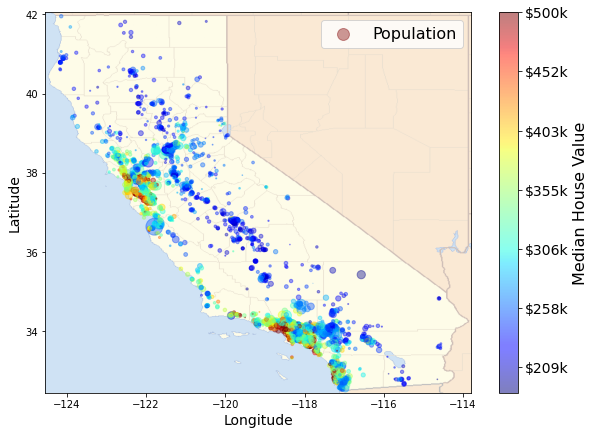

In [28]:
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(images_path, filename))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [29]:
# correlation
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

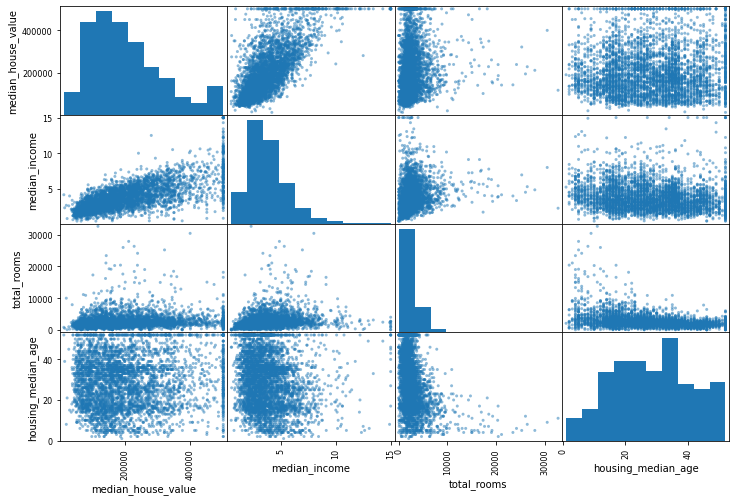

In [30]:
# correlation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

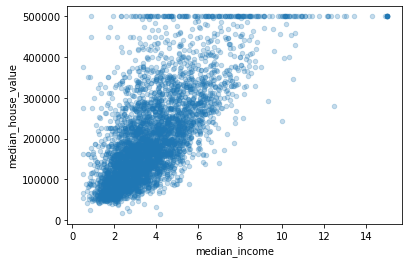

In [31]:
# expand the characteristic which seems useful to predict median_house_value

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.25)

In [32]:
# experiment with the combination of characteristics
housing["roome_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
roome_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

---
### Data Cleaning

- 1. eliminate the area
- 2. eliminate the total charateristics
- 3. fill some value
---

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roome_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000
mean,-119.545981,35.602049,28.583818,2688.656250,549.721746,1448.634205,509.651163,3.849818,206257.795058,5.383375,0.213705,2.967399
std,2.010400,2.127889,12.629796,2345.997876,454.528621,1197.164964,407.677609,1.879332,114176.653346,1.822694,0.060349,1.584661
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.000000,2.542675,118900.000000,4.434273,0.175927,2.424681
50%,-118.460000,34.220000,28.000000,2159.500000,442.000000,1172.500000,416.000000,3.513200,181300.000000,5.218307,0.203604,2.822308
75%,-117.980000,37.690000,37.000000,3171.250000,653.000000,1754.250000,613.250000,4.739225,268850.000000,6.031716,0.239791,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,37.063492,1.000000,63.750000


### Data Preparation

In [34]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

---
### option 1   
- housing.dropna(subset=["total_bedrooms"])   

### option 2
- housing.drop("total_bedrooms", axis = 1)   

### option 3
- median = housing["total_bedrooms"].median() 
- housing["total_bedrooms"].fillna(median, inplace=True)
---

In [35]:
# make copy
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [36]:
# SimpleImputer makes controling omitted values simple

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ="median")

housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
# replace the omitted value
X = imputer.transform(housing_num)

# numpy -> pandas
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [39]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [40]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


--- 
- view the text chracteristic
---

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [42]:
# transfrom text to number

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# one-hot-encoding: 1 or 0
# new feature: dummy

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# OneHotEncoder returns sparse matrix
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---
### Converter
---

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):   # initialize
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None): 
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


---
### Feature Scaling

#### 1. Min-Max Scaling (normalization)
- range: 0~1
- data = (data - min) / (max - min)

#### 2. Standardization
- no range
- data = (data - avg) / std
- be less affected to outlier
---

### Converter Pipline
#### data cleaning and preparing for machine learning algorithm

- num_pipeline returns congestion matrix


- OneHotEncoder returns sparse matrix


- When congestion matrix and sparse matrix are mixed, ColumnTransformer estimate the density of final matrix
---

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [50]:
from sklearn.compose import ColumnTransformer
 
num_attribs = list(housing_num)    # numerical attribute
cat_attribs = ["ocean_proximity"]  # categorical attribute

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

---
### Model Selection and Training
---

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("prediction: ", lin_reg.predict(some_data_prepared))

print("label: ", list(some_labels))

prediction:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
label:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [53]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
line_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(line_mse)

lin_rmse

68627.87390018745

---
### The prediction error (68627.87)  means that the model is an example of underfitting training data

#### Solution
- 1. use more powerful model
- 2. add new attribute to the data set or decrease the restriction of mode
---

In [54]:
# decision tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

--- 
#### Error (0.0) means the model is overfitting to the data set
#### Thus, we need cross-validation
---

### k-fold cross-validation
- 1. Randomly separate training set into 10 subsets called fold
- 2. Validation works by using the decision tree model
- 3. On every round, select a different fold and use the fold on the validation
- 4. Use the rest of the folds on training
- 5. result: array which includes 10 validation scores
---

In [55]:
def display_scores(scores):
    print("Score: ",scores)
    print("Average: ",np.mean(scores))
    print("Standard Deviation: ", scores.std())

In [56]:
# Decision Tree

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)

# cost function <> utility function
# tree_rmse_scores = utility function
tree_rmse_scores = np.sqrt(-scores)

In [58]:
display_scores(tree_rmse_scores)

Score:  [71725.13529502 70249.70013922 67567.90734973 72012.77048513
 69449.46670927 77858.30518592 69761.03722972 73439.03958956
 68201.93264678 71384.04590982]
Average:  71164.93405401913
Standard Deviation:  2802.192377755462


In [59]:
# Linear Regression 

In [60]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring = "neg_mean_squared_error",cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Score:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Average:  69104.07998247063
Standard Deviation:  2880.3282098180657


In [61]:
# RandomForestRegressor Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18661.77601155405

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                             scoring = "neg_mean_squared_error",cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Score:  [51451.68602655 49207.06099157 47273.02868912 52081.69675857
 47089.95194366 51407.68979516 52382.88851422 49907.6040344
 48606.35156645 53745.30111253]
Average:  50315.325943225136
Standard Deviation:  2135.8341538198447


---
### Model Detailed Tuning
---

In [65]:
# GridSearchCV evaluates all combinations of hyper-parameter

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [69]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048232,0.009365,0.002020,0.000223,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.057663e+09,-4.025335e+09,...,-4.065800e+09,5.408448e+07,18,-1.061896e+09,-1.134769e+09,-1.156133e+09,-1.057137e+09,-1.084123e+09,-1.098812e+09,3.973414e+07
1,0.144291,0.001106,0.006032,0.000067,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.093871e+09,-3.119025e+09,...,-3.079711e+09,7.257268e+07,11,-5.940899e+08,-6.034644e+08,-5.997566e+08,-5.969453e+08,-5.736682e+08,-5.935849e+08,1.042994e+07
2,0.428014,0.002000,0.018722,0.000352,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.935612e+09,-2.623397e+09,...,-2.790887e+09,1.095612e+08,9,-4.534365e+08,-4.269879e+08,-4.347376e+08,-4.317231e+08,-4.205187e+08,-4.334808e+08,1.107317e+07
3,0.072208,0.002096,0.001918,0.000007,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.690119e+09,-3.323117e+09,...,-3.679875e+09,2.386876e+08,16,-9.985986e+08,-9.724275e+08,-9.704178e+08,-1.008193e+09,-1.027317e+09,-9.953906e+08,2.165363e+07
4,0.240155,0.003879,0.005896,0.000017,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.748793e+09,-2.653698e+09,...,-2.758064e+09,1.063106e+08,7,-5.092744e+08,-5.083752e+08,-5.234175e+08,-5.283498e+08,-5.265920e+08,-5.192018e+08,8.623717e+06
5,0.711835,0.003954,0.019223,0.000174,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.552521e+09,-2.358224e+09,...,-2.505991e+09,9.020858e+07,1,-3.892556e+08,-3.865357e+08,-3.972453e+08,-3.884775e+08,-3.870699e+08,-3.897168e+08,3.887220e+06
6,0.101537,0.002454,0.001919,0.000022,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.492978e+09,-3.561406e+09,...,-3.538352e+09,9.908613e+07,14,-9.256541e+08,-9.618557e+08,-9.540501e+08,-9.062980e+08,-8.838306e+08,-9.263377e+08,2.911501e+07
7,0.337974,0.002845,0.006014,0.000066,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.720706e+09,-2.655555e+09,...,-2.778975e+09,1.089447e+08,8,-5.170020e+08,-5.139661e+08,-5.097216e+08,-5.071531e+08,-5.106971e+08,-5.117080e+08,3.430469e+06
8,1.007467,0.006534,0.019586,0.000308,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.552438e+09,-2.390790e+09,...,-2.506984e+09,7.590318e+07,2,-3.885043e+08,-3.868367e+08,-3.903762e+08,-3.730576e+08,-3.818729e+08,-3.841296e+08,6.215596e+06
9,0.131274,0.001750,0.001920,0.000028,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.446133e+09,-3.251984e+09,...,-3.507737e+09,1.446711e+08,13,-9.030162e+08,-8.643303e+08,-9.621490e+08,-8.936362e+08,-8.671419e+08,-8.980547e+08,3.534162e+07


In [67]:
# evaluation score
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63763.6287246028 {'max_features': 2, 'n_estimators': 3}
55495.14277080914 {'max_features': 2, 'n_estimators': 10}
52828.8499971684 {'max_features': 2, 'n_estimators': 30}
60661.97042063829 {'max_features': 4, 'n_estimators': 3}
52517.27747707408 {'max_features': 4, 'n_estimators': 10}
50059.87728861199 {'max_features': 4, 'n_estimators': 30}
59484.044929135416 {'max_features': 6, 'n_estimators': 3}
52715.97997827251 {'max_features': 6, 'n_estimators': 10}
50069.79602331584 {'max_features': 6, 'n_estimators': 30}
59226.149140501606 {'max_features': 8, 'n_estimators': 3}
51704.40630247509 {'max_features': 8, 'n_estimators': 10}
50118.8508248903 {'max_features': 8, 'n_estimators': 30}
62926.840342363495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53909.940003922 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60350.570932103925 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52259.36036930358 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [70]:
# Random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa105883c40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa0bc8014f0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [68]:
# find the best model and error analysis
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.60609148e-02, 7.70977300e-02, 4.25237032e-02, 2.16150226e-02,
       1.96715423e-02, 2.19429301e-02, 2.02449854e-02, 3.17942491e-01,
       6.22891808e-02, 1.02736453e-01, 7.58476316e-02, 2.06906429e-02,
       1.10708351e-01, 7.21289214e-05, 9.21782218e-03, 1.13384700e-02])

In [71]:
extra_attribs = ["rooms_per_hhold", "pop_per_hold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]

cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3179424912808279, 'median_income'),
 (0.11070835083796644, 'INLAND'),
 (0.10273645308311449, 'pop_per_hold'),
 (0.0860609147521746, 'longitude'),
 (0.07709773001229742, 'latitude'),
 (0.07584763158628295, 'bedrooms_per_room'),
 (0.06228918081304988, 'rooms_per_hhold'),
 (0.042523703166216224, 'housing_median_age'),
 (0.02194293011907874, 'population'),
 (0.02161502257540173, 'total_rooms'),
 (0.020690642942219072, '<1H OCEAN'),
 (0.02024498543078916, 'households'),
 (0.01967154231457003, 'total_bedrooms'),
 (0.011338469989448098, 'NEAR OCEAN'),
 (0.009217822175161528, 'NEAR BAY'),
 (7.212892140177036e-05, 'ISLAND')]

- This information allows us to exclude less important characteristics

In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis =1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48098.93087642721

In [74]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                        loc = squared_errors.mean(),
                        scale=stats.sem(squared_errors)))



array([46091.75057998, 50025.64173885])